In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("./datasets/raw/dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\pc\AppData\Local\Temp\ipykernel_8600\4005460490.py:1: SyntaxWarning: invalid escape sequence '\p'
  data=pd.read_csv('E:\pythonn\Projects\healthcare-dataset-stroke-data.csv')


In [ ]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
data.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
cat_col=data.select_dtypes(include=['object']).columns.to_list()

In [ ]:
for c in cat_col:
    print(f'{c}: {data[c].unique()}')

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
print(data['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [ ]:
print(data['smoking_status'].value_counts())

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [ ]:
data = data.drop(data[data['gender'] == 'Other'].index, axis=0)

In [ ]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.dropna(subset='bmi',inplace=True)

In [ ]:
data.drop(['id'],inplace=True,axis=1)

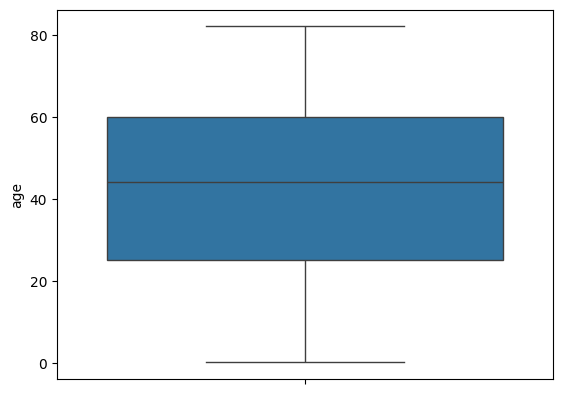

In [ ]:
sns.boxplot(data=data['age'])
plt.show()

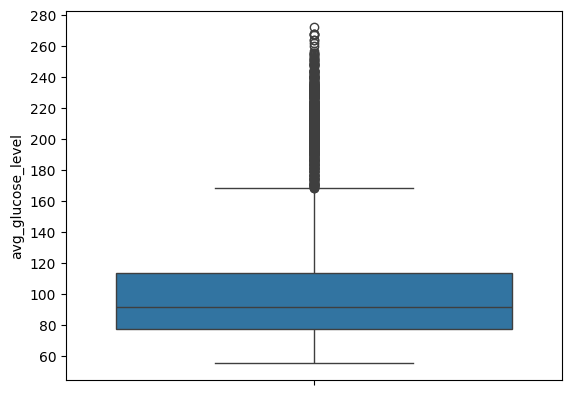

In [ ]:
sns.boxplot(data=data['avg_glucose_level'])
plt.locator_params(axis='y', nbins=15)
plt.show()

In [ ]:
print(data['avg_glucose_level'].max())
# classified as severe hyperglycemia

271.74


In [ ]:
print(data['avg_glucose_level'].min()) 
#falls within the range of mild hypoglycemia (low blood sugar)

55.12


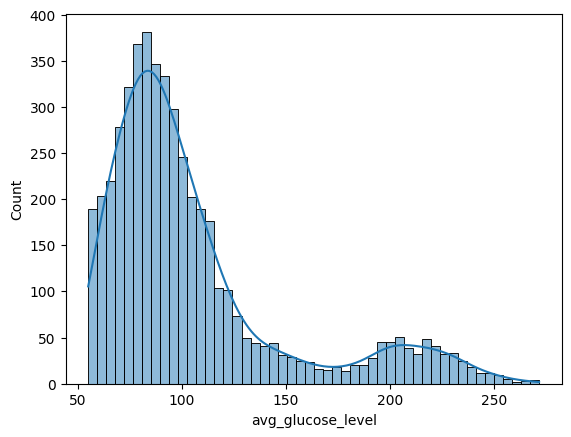

In [ ]:
sns.histplot(data['avg_glucose_level'], bins=50, kde=True)
plt.show()

In [ ]:
print((data['avg_glucose_level'] > 250).sum())
print((data['avg_glucose_level'] > 300).sum())

23
0


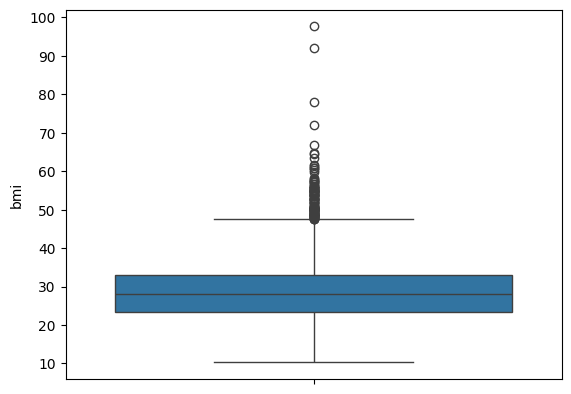

In [ ]:
sns.boxplot(data=data['bmi'])
plt.locator_params(axis='y', nbins=15)
plt.show()

In [ ]:
RangeData_bmi = data[data['bmi']<50]
OutlierData_bmi = data[data['bmi']>=50]
RangeData_bmi.shape, OutlierData_bmi.shape

((4829, 11), (79, 11))

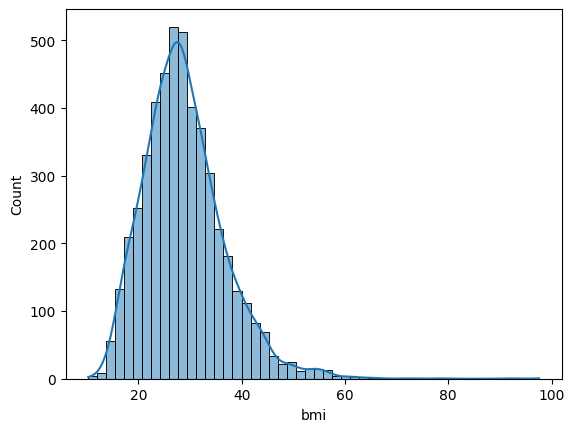

In [ ]:
sns.histplot(data['bmi'], bins=50, kde=True)
plt.show()

In [ ]:
outliers = data[(data['bmi'] < 10) | (data['bmi'] > 60)]
outliers.shape

(13, 11)

In [ ]:
data = data[(data['bmi'] >= 10) & (data['bmi'] <= 60)]
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.reset_index(drop=True, inplace=True)

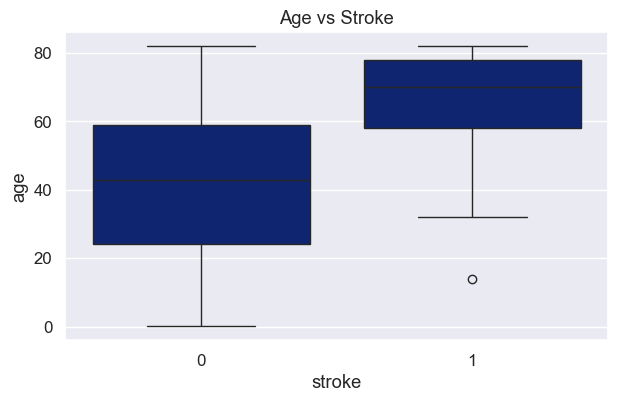

In [ ]:
sns.set(style="darkgrid", palette="dark", font_scale=1.1)
plt.figure(figsize=(7,4))
sns.boxplot(x='stroke', y='age', data=data)
plt.title("Age vs Stroke")
plt.show()

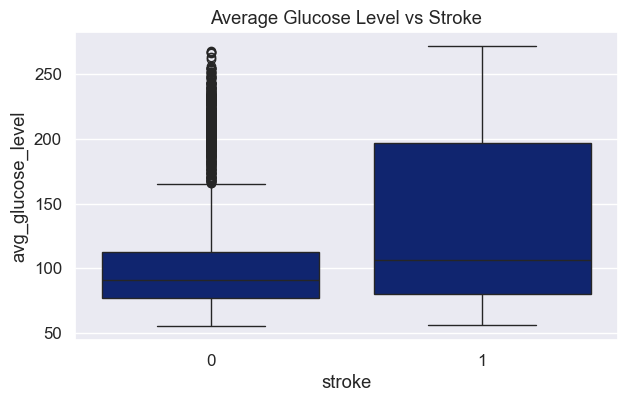

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)
plt.title("Average Glucose Level vs Stroke")
plt.show()

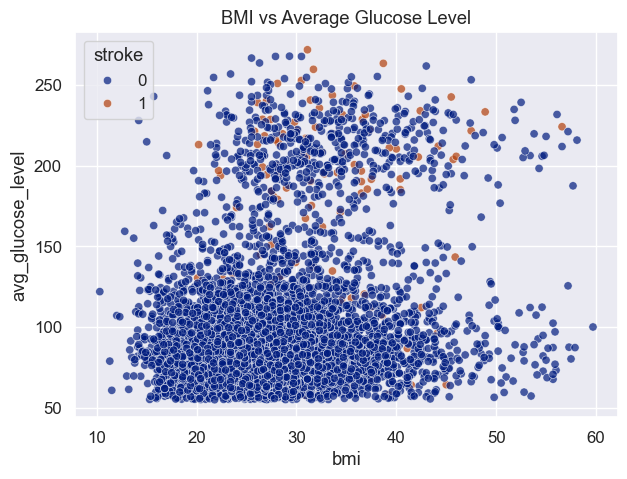

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='bmi', y='avg_glucose_level', hue='stroke', alpha=0.7)
plt.title("BMI vs Average Glucose Level")
plt.show()

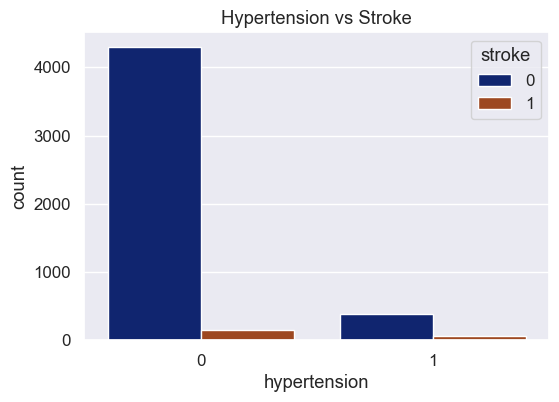

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.title("Hypertension vs Stroke")
plt.show()

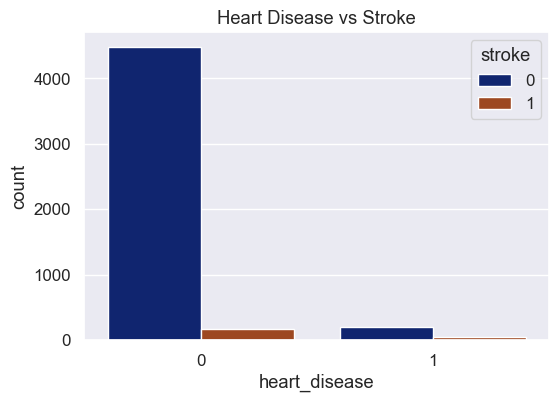

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='heart_disease', hue='stroke', data=data)
plt.title("Heart Disease vs Stroke")
plt.show()

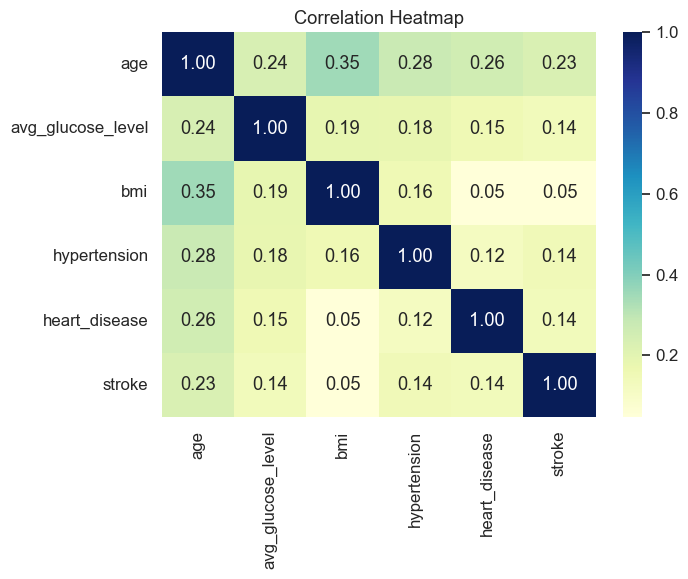

In [ ]:
#Correlation Coefficient
plt.figure(figsize=(7,5))
numeric_cols = ['age','avg_glucose_level','bmi','hypertension','heart_disease','stroke']
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()